In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install missingno
!pip install fancyimpute
!pip install statsmodels.api 
!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api


In [2]:
creditos = pd.read_csv(r'/Users/juanpablohernandez/Downloads/credit.csv', index_col = 0)

In [3]:
creditos.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
creditos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
creditos.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


/Users/juanpablohernandez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

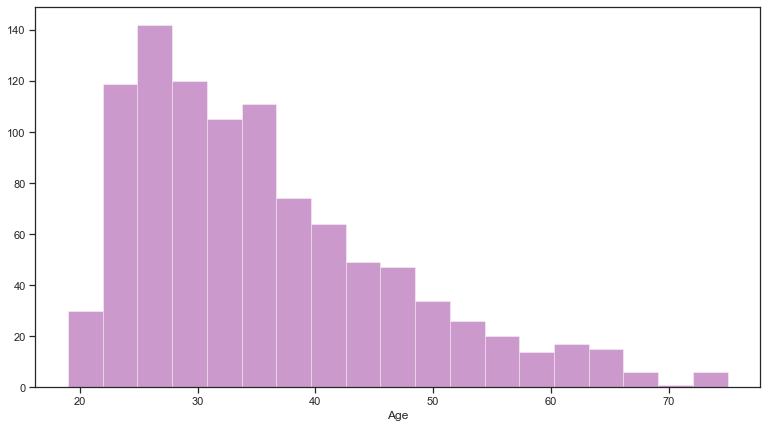

In [6]:
sns.set_theme(style = "ticks")
filter_data = creditos.dropna(subset = ['Age'])
plt.figure(figsize = (13,7))
sns.distplot(filter_data['Age'], kde = False, color = 'purple')

<AxesSubplot:xlabel='Age', ylabel='Density'>

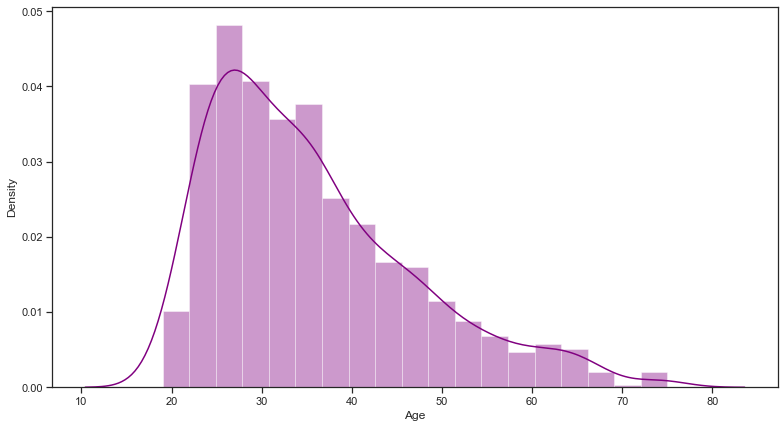

In [7]:
sns.set_theme(style = "ticks")
filter_data = creditos.dropna(subset = ['Age'])
plt.figure(figsize = (13,7))
sns.distplot(filter_data['Age'], kde = True, color = 'purple')

/Users/juanpablohernandez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit amount'>

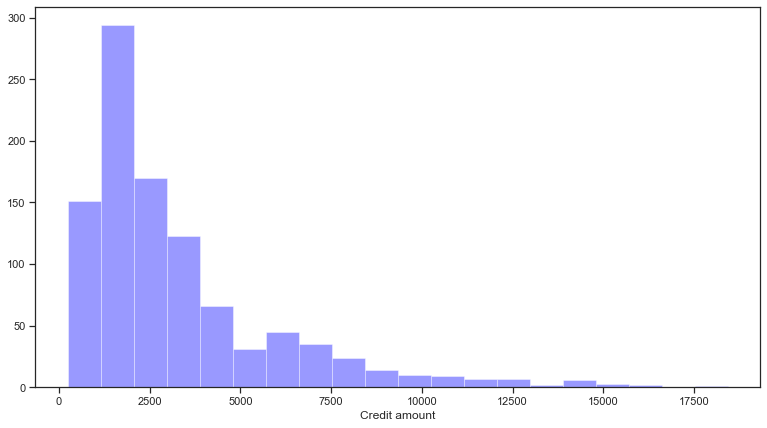

In [8]:
sns.set_theme(style = "ticks")
filter_data = creditos.dropna(subset = ['Credit amount'])
plt.figure(figsize = (13,7))
sns.distplot(filter_data['Credit amount'], kde = False, bins = 20, color = 'blue')

<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

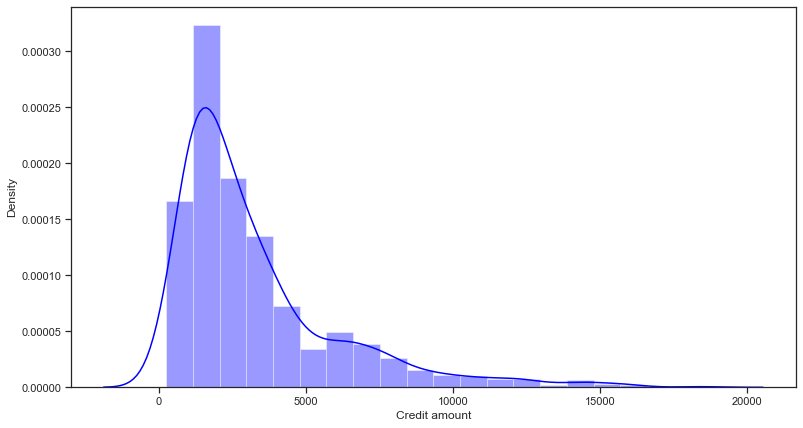

In [9]:
sns.set_theme(style = "ticks")
filter_data = creditos.dropna(subset = ['Credit amount'])
plt.figure(figsize = (13,7))
sns.distplot(filter_data['Credit amount'], kde = True, bins = 20, color = 'blue')

/Users/juanpablohernandez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration'>

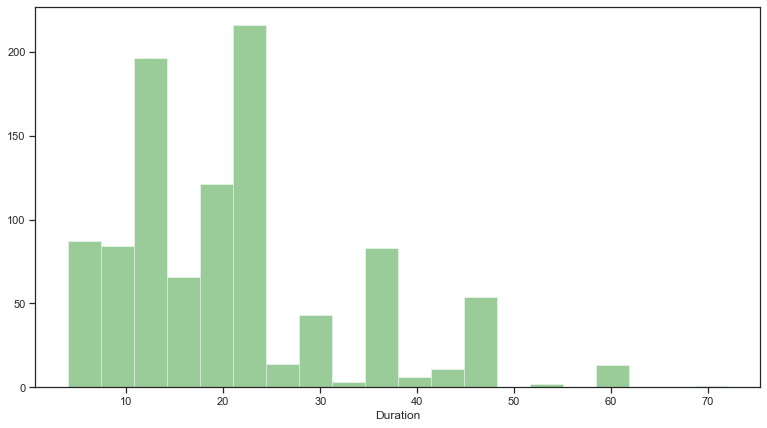

In [10]:
sns.set_theme(style = "ticks")
filter_data = creditos.dropna(subset = ['Duration'])
plt.figure(figsize = (13,7))
sns.distplot(filter_data['Duration'], kde = False, bins = 20, color = 'green')

<AxesSubplot:xlabel='Duration', ylabel='Density'>

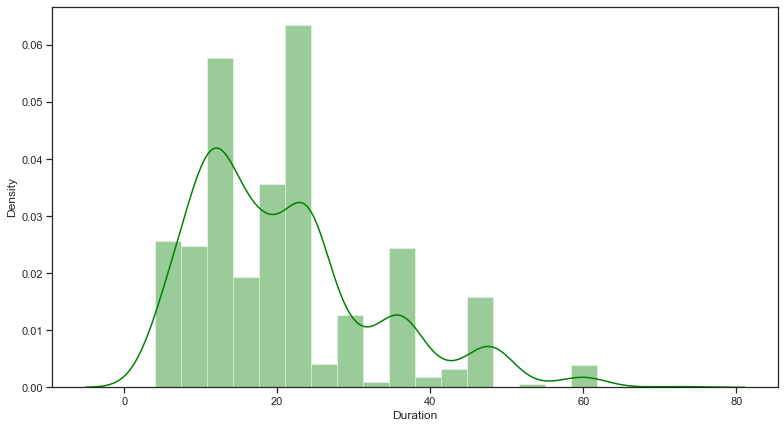

In [11]:
sns.set_theme(style = "ticks")
filter_data = creditos.dropna(subset = ['Duration'])
plt.figure(figsize = (13,7))
sns.distplot(filter_data['Duration'], kde = True, bins = 20, color = 'green')

In [12]:
desc_sex = creditos['Sex'].describe()
desc_job = creditos['Job'].describe()
desc_housing = creditos['Housing'].describe()
desc_saving = creditos['Saving accounts'].describe()
desc_checking = creditos['Checking account'].describe()
desc_purpose = creditos['Purpose'].describe()
desc_risk = creditos['Risk'].describe()

In [13]:
print(desc_purpose)

count     1000
unique       8
top        car
freq       337
Name: Purpose, dtype: object


In [14]:
comp_sex = creditos['Sex'].value_counts(sort = True)
comp_job = creditos['Job'].value_counts(sort = True)
comp_housing = creditos['Housing'].value_counts(sort = True)
comp_saving = creditos['Saving accounts'].value_counts(sort = True)
comp_checking = creditos['Checking account'].value_counts(sort = True)
comp_purpose = creditos['Purpose'].value_counts(sort = True)
comp_risk = creditos['Risk'].value_counts(sort = True)

In [15]:
print(comp_risk)

good    700
bad     300
Name: Risk, dtype: int64


In [16]:
part_sex = creditos['Sex'].value_counts(sort = True, normalize = True)
part_job = creditos['Job'].value_counts(sort = True, normalize = True)
part_housing = creditos['Housing'].value_counts(sort = True, normalize = True)
part_saving = creditos['Saving accounts'].value_counts(sort = True, normalize = True)
part_checking = creditos['Checking account'].value_counts(sort = True, normalize = True)
part_purpose = creditos['Purpose'].value_counts(sort = True, normalize = True)
part_risk = creditos['Risk'].value_counts(sort = True, normalize = True)

In [17]:
print(part_job)

2    0.630
1    0.200
3    0.148
0    0.022
Name: Job, dtype: float64


In [18]:
creditos_missing = creditos
missing_data = creditos_missing.isna()
missing_data.sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

<AxesSubplot:>

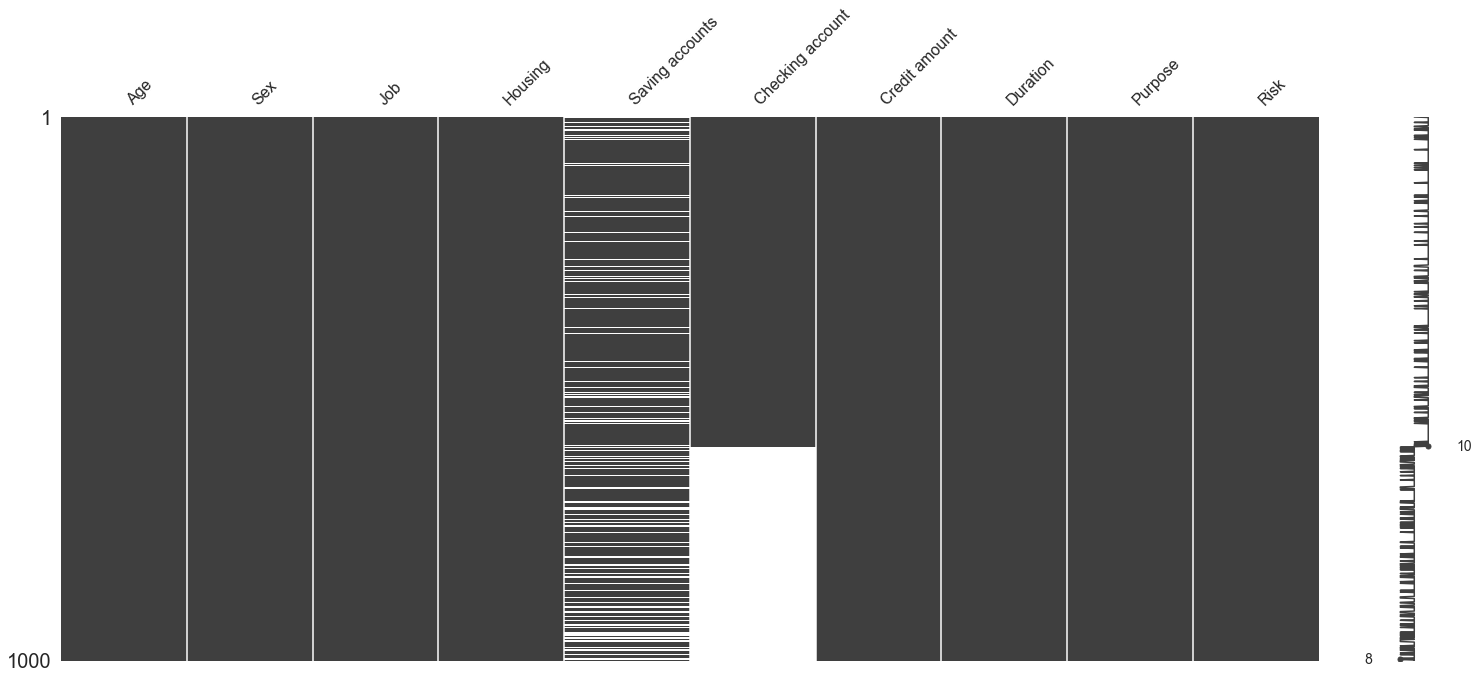

In [19]:
sorted = creditos_missing.sort_values('Checking account')
msno.matrix(sorted)

<AxesSubplot:>

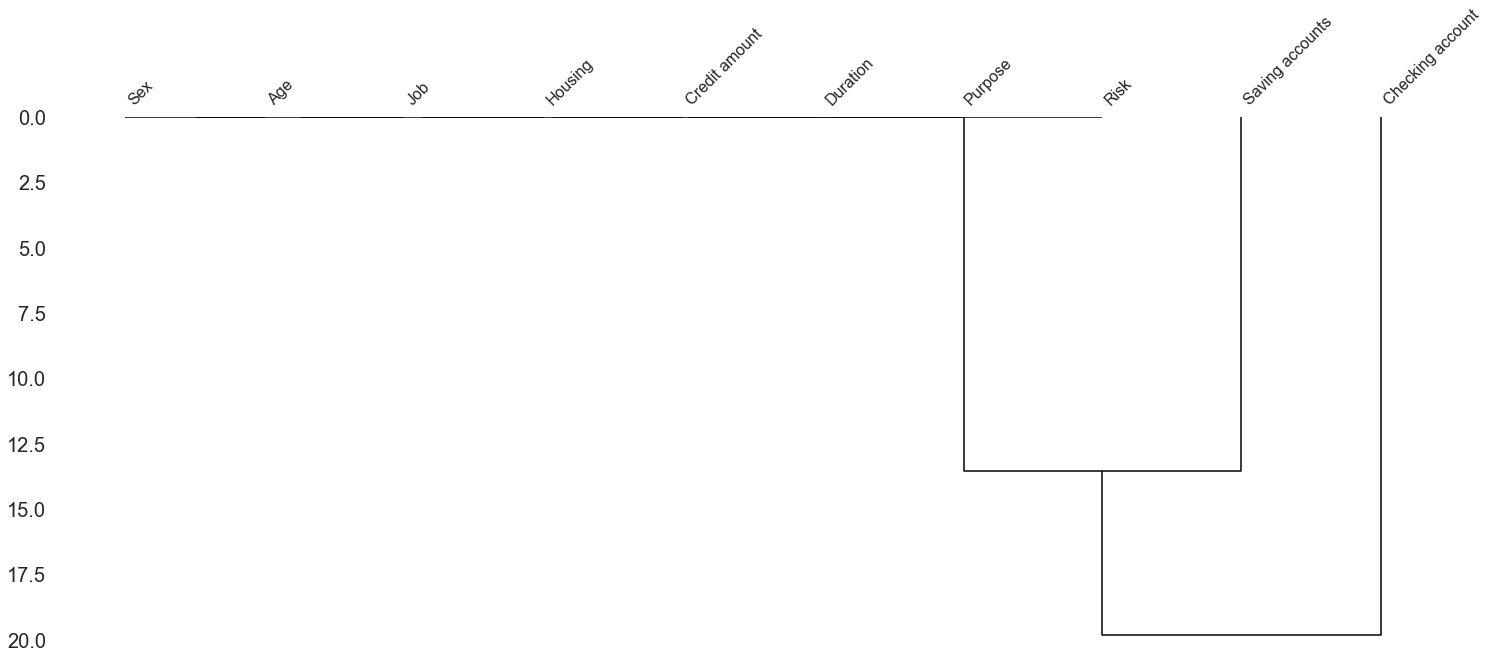

In [20]:
msno.dendrogram(creditos)

In [21]:
creditos_missing = creditos
columnas = creditos_missing[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']]
ordinal_enc_dict = {}
for columnas in creditos_missing:
    ordinal_enc_dict[columnas] = OrdinalEncoder()
    col = creditos_missing[columnas]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[columnas].fit_transform(reshaped_vals)
    creditos_missing.loc[col.notnull(), columnas] = np.squeeze(encoded_vals)

In [22]:
creditos_missing.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,48.0,1.0,2.0,1.0,NaN,0.0,142.0,2.0,5.0,1.0
1,3.0,0.0,2.0,1.0,0.0,1.0,770.0,29.0,5.0,0.0
2,30.0,1.0,1.0,1.0,0.0,NaN,390.0,8.0,3.0,1.0
3,26.0,1.0,2.0,0.0,0.0,0.0,848.0,26.0,4.0,1.0
4,34.0,1.0,2.0,0.0,0.0,0.0,734.0,17.0,1.0,0.0


In [23]:
corr_matrix = creditos_missing.corr()

<AxesSubplot:>

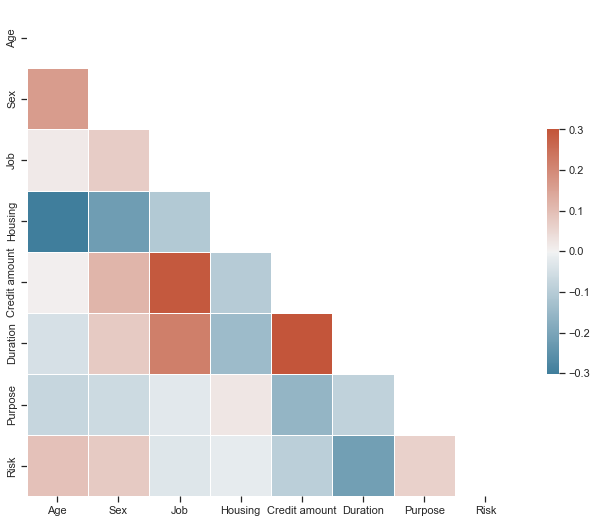

In [24]:
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr_matrix, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [25]:
knn_imputer = KNN()
creditos_missing_knn = creditos_missing.copy(deep = True)
creditos_missing_knn.iloc[:, :] = knn_imputer.fit_transform(creditos_missing_knn)
X = sm.add_constant(creditos_missing_knn.iloc[:, :-1])
y = creditos_missing_knn['Risk']
lm_KNN = sm.OLS(y, X).fit()

Imputing row 1/1000 with 1 missing, elapsed time: 0.154
Imputing row 101/1000 with 1 missing, elapsed time: 0.156
Imputing row 201/1000 with 1 missing, elapsed time: 0.157
Imputing row 301/1000 with 1 missing, elapsed time: 0.159
Imputing row 401/1000 with 1 missing, elapsed time: 0.161
Imputing row 501/1000 with 0 missing, elapsed time: 0.163
Imputing row 601/1000 with 0 missing, elapsed time: 0.165
Imputing row 701/1000 with 1 missing, elapsed time: 0.167
Imputing row 801/1000 with 1 missing, elapsed time: 0.169
Imputing row 901/1000 with 0 missing, elapsed time: 0.171


/Users/juanpablohernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
MICE_imputer = IterativeImputer()
creditos_missing_MICE = creditos_missing.copy(deep = True)
creditos_missing_MICE.iloc[:, :] = MICE_imputer.fit_transform(creditos_missing_MICE)
X = sm.add_constant(creditos_missing_MICE.iloc[:, :-1])
y = creditos_missing_MICE['Risk']
lm_MICE = sm.OLS(y, X).fit()

/Users/juanpablohernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
creditos_nonan = creditos_missing.dropna(how = 'any')
X = sm.add_constant(creditos_nonan.iloc[:, :-1])
y = creditos_nonan['Risk']
lm_nonan = sm.OLS(y, X.astype(float)).fit()

In [28]:
creditos_mean = creditos_missing.copy(deep = True)
mean_imputer = SimpleImputer(strategy = 'mean')
creditos_mean.iloc[:, :] = mean_imputer.fit_transform(creditos_mean)
X = sm.add_constant(creditos_mean.iloc[:, :-1])
y = creditos_mean['Risk']
lm_mean = sm.OLS(y, X).fit()

/Users/juanpablohernandez/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
print(pd.DataFrame({'No_NaN': lm_nonan.rsquared_adj,
                   'Mean': lm_mean.rsquared_adj,
                   'KNN': lm_KNN.rsquared_adj,
                   'MICE': lm_MICE.rsquared_adj}, index = ['R_squared_adj']))

                 No_NaN      Mean       KNN      MICE
R_squared_adj  0.119232  0.088166  0.090625  0.097345


In [30]:
print(pd.DataFrame({'No_NaN': lm_nonan.params,
                   'Mean': lm_mean.params,
                   'KNN': lm_KNN.params,
                   'MICE': lm_MICE.params}))

                    No_NaN      Mean       KNN      MICE
const             0.632379  0.633370  0.635189  0.616173
Age               0.001542  0.002478  0.002426  0.002369
Sex               0.084035  0.075786  0.075668  0.075168
Job              -0.021631 -0.001005 -0.001104 -0.000743
Housing          -0.015408 -0.012568 -0.011500 -0.011544
Saving accounts   0.072457  0.071053  0.076436  0.070798
Checking account  0.082023  0.101757  0.091168  0.120611
Credit amount     0.000297  0.000150  0.000155  0.000156
Duration         -0.024907 -0.015973 -0.015930 -0.015907
Purpose           0.013838  0.014638  0.014523  0.014175


In [31]:
X = creditos_missing_MICE[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
y = creditos_missing_MICE['Risk']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values.reshape(-1,1),
                                                    train_size = 0.8, random_state = 1234, shuffle = True)
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

ValueError: Found input variables with inconsistent numbers of samples: [9000, 1000]